In [142]:
#@title  Импорт необходимых библиотек
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import datasets, linear_model
from scipy import stats

%matplotlib inline

In [143]:
#@title  Загрузка и описание данных
boston_ds=load_boston()
print('dir = '+str(dir(boston_ds)))
print(boston_ds.DESCR)

dir = ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [144]:
#@title  Посмотрим на них
data=pd.DataFrame(data=boston_ds.data,columns=boston_ds.feature_names)
data['PRICE']=boston_ds.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


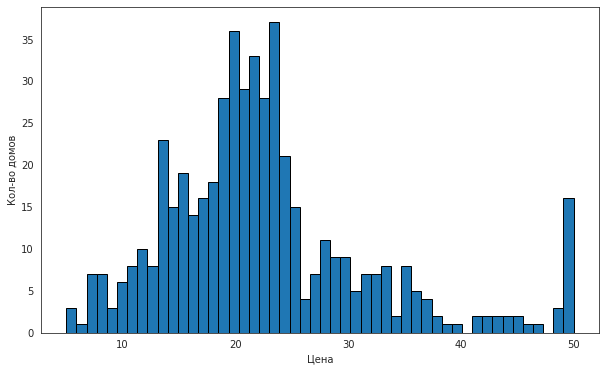

In [145]:
#@title Визуализируем данные, котрые будем предсказывать
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins=50,ec='black')
plt.xlabel('Цена')
plt.ylabel('Кол-во домов')
plt.show()

Присутствует явная ассиметрия - в будущем уменьшим её воздействие на модель.

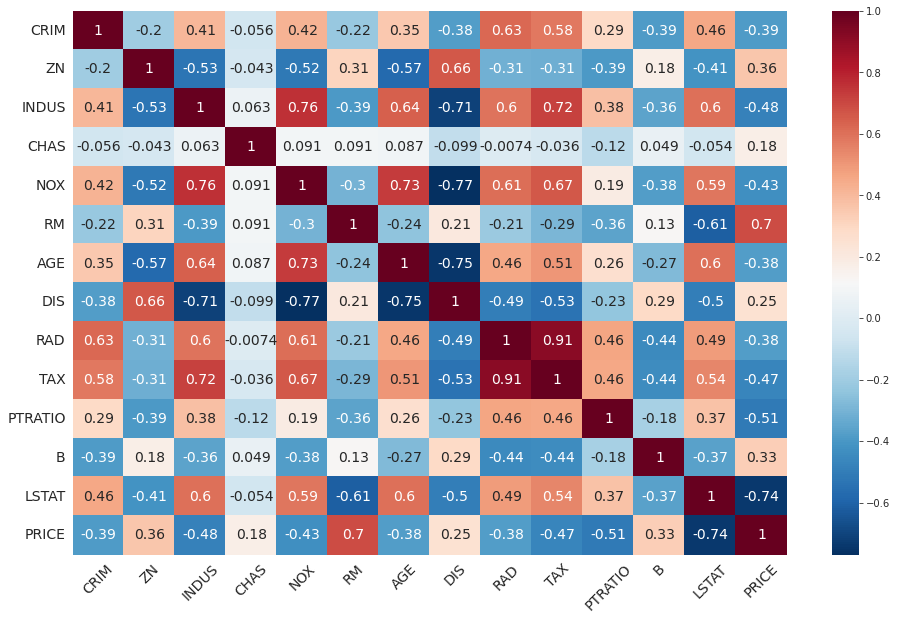

In [146]:
#@title Карта корреляции параметров для первичного анализа
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap ='RdBu_r',annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14,rotation=0)
plt.show()

Выше показана корреляция между разными параметрами.

Замечания:
1. Корелляция параметров между собой (не с предиктором) - плохо, эта мултиколлинеаррность нам будет мешать.
2. Имеются переменные, которые не очень важны для предсказания - посмотрим p-значениея (далее их уберём).

**Подготовка данных**

In [147]:
y=data['PRICE']
features=pd.DataFrame(data=boston_ds.data,columns=boston_ds.feature_names)

X_train, X_test,y_train,y_test=train_test_split(features, prices,
                                                test_size=0.2,random_state=42)

# **Мультилинейная регрессия**

In [148]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state=42)
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)

print('Training data r-squared:', lin_reg_mod.score(X_train,y_train))
print('Test data r-ssquared: ',lin_reg_mod.score(X_test,y_test))
print('intercept' ,lin_reg_mod.intercept_)

model_coef=pd.DataFrame(data=lin_reg_mod.coef_,index=X_train.columns,columns=['coef']).sort_values(by='coef')
model_coef

Training data r-squared: 0.7508856358979673
Test data r-ssquared:  0.6687594935356307
intercept 30.24675099392392


,coef
NOX,-17.202633
DIS,-1.447865
PTRATIO,-0.915456
LSTAT,-0.508571
CRIM,-0.113056
TAX,-0.010647
AGE,-0.006296
B,0.012351
ZN,0.030110
INDUS,0.040381


In [149]:
# @title Проверим точность нашей модели с различным количеством переменных
features=pd.DataFrame(data=boston_ds.data,columns=boston_ds.feature_names)

for i in range(features.shape[1]-4):

  print('Количество переменных = ', features.shape[1])
  X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state=42)
                                                      
  lin_reg_mod = LinearRegression()
  lin_reg_mod.fit(X_train, y_train)
  pred = lin_reg_mod.predict(X_test)

  features.drop(model_coef.index[0], axis=1,inplace=True)
  model_coef.drop(model_coef.index[0], axis=0,inplace=True)

  print('Training data r-squared:', lin_reg_mod.score(X_train,y_train))
  print('Test data r-ssquared: ',lin_reg_mod.score(X_test,y_test))
  print('')

Количество переменных =  13
Training data r-squared: 0.7508856358979673
Test data r-ssquared:  0.6687594935356307

Количество переменных =  12
Training data r-squared: 0.7403517718273758
Test data r-ssquared:  0.6543407093082303

Количество переменных =  11
Training data r-squared: 0.7208899492537246
Test data r-ssquared:  0.6227409428950725

Количество переменных =  10
Training data r-squared: 0.6925231387586404
Test data r-ssquared:  0.5819426173947553

Количество переменных =  9
Training data r-squared: 0.632060889256312
Test data r-ssquared:  0.49829930230343256

Количество переменных =  8
Training data r-squared: 0.6252965836371109
Test data r-ssquared:  0.48585860034596506

Количество переменных =  7
Training data r-squared: 0.6210565756396519
Test data r-ssquared:  0.46115351634040636

Количество переменных =  6
Training data r-squared: 0.6160081062085144
Test data r-ssquared:  0.4593558568770538

Количество переменных =  5
Training data r-squared: 0.5932577651140072
Test data r

Прологарифмируем прогнозируемые значения, чтобы ассиметрия влияло на нашу модель в меньшей степени и посмотрим на эффективность новой модели.

In [150]:
print('Ассиметрия до логарифмирования: ', abs(data['PRICE'].skew()))
y_log = np.log(data['PRICE'])
y_log.tail()
print('Ассиметрия после логарифмирования: ', abs(y_log.skew()))

Ассиметрия до логарифмирования:  1.1080984082549072
Ассиметрия после логарифмирования:  0.33032129530987864


In [151]:
#@title Посмотрим на эффективность новых моделей с логарифмированием

features=pd.DataFrame(data=boston_ds.data,columns=boston_ds.feature_names)

for i in range(features.shape[1]-4):
  print('Количество переменных = ', features.shape[1])
  X_train, X_test, y_train, y_test = train_test_split(features, y_log, test_size = 0.2, random_state=42)
                                                      
  lin_reg_mod = LinearRegression()
  lin_reg_mod.fit(X_train, y_train)
  pred = lin_reg_mod.predict(X_test)
  model_coef=pd.DataFrame(data=lin_reg_mod.coef_,index=X_train.columns,columns=['coef']).sort_values(by='coef')

  features.drop(model_coef.index[0], axis=1,inplace=True)
  model_coef.drop(model_coef.index[0], axis=0,inplace=True)

  print('Training data r-squared:', lin_reg_mod.score(X_train,y_train))
  print('Test data r-ssquared: ',lin_reg_mod.score(X_test,y_test))
  print('')

Количество переменных =  13
Training data r-squared: 0.795714923175866
Test data r-ssquared:  0.7462724975382747

Количество переменных =  12
Training data r-squared: 0.7860333902691667
Test data r-ssquared:  0.7301534279246948

Количество переменных =  11
Training data r-squared: 0.7757430828932856
Test data r-ssquared:  0.7187778618013192

Количество переменных =  10
Training data r-squared: 0.7542221246910877
Test data r-ssquared:  0.6930755413267599

Количество переменных =  9
Training data r-squared: 0.6602563463331399
Test data r-ssquared:  0.5832657776111271

Количество переменных =  8
Training data r-squared: 0.6312849595936671
Test data r-ssquared:  0.5198307325435454

Количество переменных =  7
Training data r-squared: 0.630772351756874
Test data r-ssquared:  0.5289769944180888

Количество переменных =  6
Training data r-squared: 0.6177363294058773
Test data r-ssquared:  0.5174337817208811

Количество переменных =  5
Training data r-squared: 0.6170427158684362
Test data r-ssq

# Дополнение
Улучшим модель, выбросив незначительные параметры, тем самым упростив её не уменьшая эффективности.

In [152]:
#@title Вызовем описательную статистику для наших параметров
X = data.drop(['PRICE',],axis=1)
y = np.log(data['PRICE'])

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.1
Date:                Fri, 19 Nov 2021   Prob (F-statistic):          4.07e-157
Time:                        15:37:23   Log-Likelihood:                 129.61
No. Observations:                 506   AIC:                            -231.2
Df Residuals:                     492   BIC:                            -172.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1020      0.204     20.081      0.0

INDUS, AGE - не значимы для модели, т.к.  *p **>** 0.05*

In [153]:
#@title Удалим ненужные поля
features=pd.DataFrame(data=boston_ds.data,columns=boston_ds.feature_names).drop(['INDUS','AGE'],axis=1)
y=np.log(data['PRICE'])

In [154]:
#@title Протестируем полученные, более простые модели

for i in range(features.shape[1]-4):
  print('Количество переменных = ', features.shape[1])
  X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state=42)
                                                      
  lin_reg_mod = LinearRegression()
  lin_reg_mod.fit(X_train, y_train)
  pred = lin_reg_mod.predict(X_test)
  model_coef=pd.DataFrame(data=lin_reg_mod.coef_,index=X_train.columns,columns=['coef']).sort_values(by='coef')

  features.drop(model_coef.index[0], axis=1,inplace=True)
  model_coef.drop(model_coef.index[0], axis=0,inplace=True)

  print('Training data r-squared:', lin_reg_mod.score(X_train,y_train))
  print('Test data r-ssquared: ',lin_reg_mod.score(X_test,y_test))
  print('')

Количество переменных =  11
Training data r-squared: 0.7950162659512618
Test data r-ssquared:  0.7482718112247504

Количество переменных =  10
Training data r-squared: 0.7851318388674337
Test data r-ssquared:  0.7322852050218993

Количество переменных =  9
Training data r-squared: 0.7746115566373213
Test data r-ssquared:  0.7167034691944121

Количество переменных =  8
Training data r-squared: 0.7516437852766777
Test data r-ssquared:  0.6904567781810165

Количество переменных =  7
Training data r-squared: 0.6502906482983712
Test data r-ssquared:  0.5754532751767134

Количество переменных =  6
Training data r-squared: 0.6172634485658621
Test data r-ssquared:  0.5063537962018002

Количество переменных =  5
Training data r-squared: 0.6170427158684362
Test data r-ssquared:  0.5125896426144598



Эффективность практически одинакова